# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from loguru import logger

/home/vinicius/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
fifa = pd.read_csv("fifa.csv")

In [4]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [47]:
# Configurando para ser possível visualizar todas as colunas do dataframe
pd.options.display.max_columns = 999

In [5]:
#Em um primeiro momento, haviam sido substituídos os valores nulos pelas pelas médias das respectivas colunas, com 
#o seguinte código --> fifa.fillna(fifa.mean(),inplace=True)

# No entanto, isto deu diferença na resposta da Questão 2. De modo que, para que se chegue na resposta correta, os
#valores nulos devem ser suprimidos...

fifa.dropna(inplace=True)


In [61]:
fifa.isnull().sum()

Age                0
Overall            0
Potential          0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

In [46]:
fifa.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


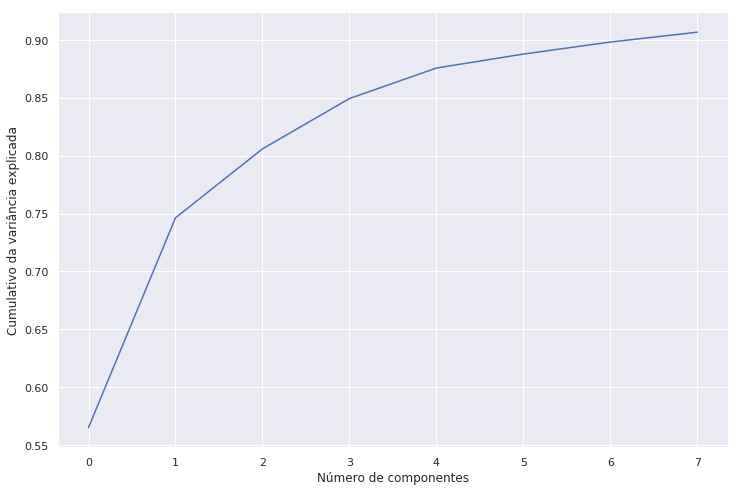

In [6]:
#Como exemplo, este gráfico demonstra a quantidade de componentes necessários para que se tenha pelo menos 90% do cumulativo
#de variância explicada (passando como parâmetro para o PCA o valor .9). Neste caso, é possível ver 
#que com 6 componentes já teríamos 90% da variância explicada. Com apenas um componente, teríamos em torno de 75% 

pca = PCA(.9).fit(fifa)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Cumulativo da variância explicada');

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [48]:
#Para a instanciação da variável pca, é passado o valor 1, que se refere ao 'Primeiro Componente Principal'

def q1(df):
    pca = PCA(1)
    pca_fifa = pca.fit(df)
    return float(pca_fifa.explained_variance_ratio_.round(3))

In [49]:
q1(fifa)

0.565

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [50]:
#Importante!!! 
#O resultado esperado são 15 variáveis. Para que se chegue a este resultado, deve-se excluir os valores nulos
#no dataframe. Caso se substitua os valores pela média, por exemplo, o resultado vai ser diferente...

#Para a instanciação da variável pca, é passado o valor .95, referente à 95% da variância total..

#O retorno da função, deve ser um 2D-Array. Deste modo, é utilizado .shape[1] para que se retorne o segundo valor
# do array, referente à quantidade de componentes principais..

def q2(df):
    pca = PCA(.95)
    pca_fifa = pca.fit_transform(df)
    return pca_fifa.shape[1]

In [51]:
q2(fifa)

15

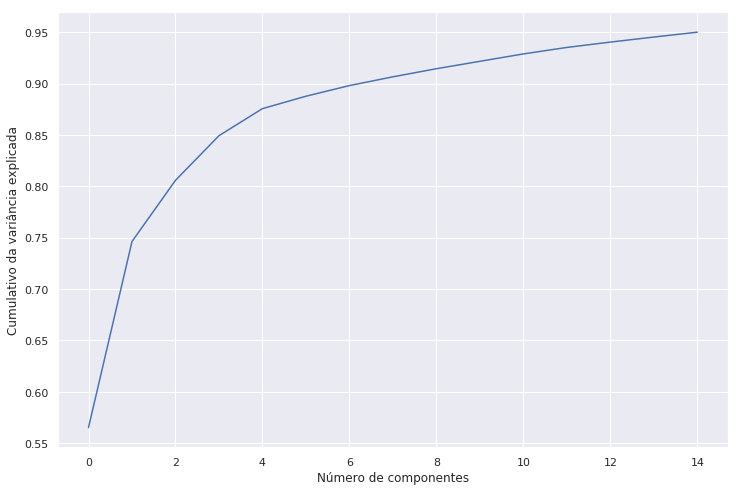

In [52]:
#O gráfico abaixo demonstra o cumulativo da variância explicada, onde é possível ver que, para 95% da variância,
#onde é possível ver que o número de componentes para este nível de variância estaria em torno de 15

pca = PCA(.95).fit(fifa)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Cumulativo da variância explicada');

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [53]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [54]:
def q3(df):
    #cria e fita um PCA com dois componentes principais a partir do dataframe de entrada
    pca = PCA(n_components=2)
    x_pca = pca.fit(df)
    
    #Os componentes PC1 e PC2 de x são obtidos através de uma mutiliplicação entre x_pca (matriz 2x37) com
    #o ponto x
    comp = x_pca.components_.dot(x)
    
    #o retorno da função são as coordenadas PC1 (comp[0]) e PC2 (comp[1]) do ponto x
    return tuple(comp.round(3))

In [55]:
q3(fifa)

(186.556, -6.592)

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [56]:
def q4(df):
    #seleciona a coluna 'Overall' como target
    y = df['Overall']
    #retira a coluna 'Overall' dos dados para o conjunto x
    x = df.drop('Overall', axis=1)
    
    #cria um objeto de regressão linear
    lr = LinearRegression()
    
    #cria um objeto RFE para a seleção de 5 features com regressão linear
    rfe = RFE(lr, n_features_to_select=5, step=1)
    
    #fita os dados de x e y com com o objeto rfe criado
    rfe_fifa = rfe.fit(x, y)
    
    return list(x.columns[rfe_fifa.support_])    

In [57]:
q4(fifa)

['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']